MultiIndex([(    'date',           'Unnamed: 0_level_1'),
            ('R740-3-1',          'cpu.mean_usage_idle'),
            ('R740-3-1',        'cpu.mean_usage_iowait'),
            ('R740-3-1',       'cpu.mean_usage_softirq'),
            ('R740-3-1',        'cpu.mean_usage_system'),
            ('R740-3-1',          'cpu.mean_usage_user'),
            ('R740-3-1',       'disk.mean_used_percent'),
            ('R740-3-1',               'diskio.io_time'),
            ('R740-3-1', 'diskio.mean_iops_in_progress'),
            ('R740-3-1',            'diskio.read_speed'),
            ...
            ('R740-3-5',                 'net.recieved'),
            ('R740-3-5',                     'net.sent'),
            ('R740-3-5',   'netstat.mean_tcp_time_wait'),
            ('R740-3-5',       'processes.mean_blocked'),
            ('R740-3-5',       'processes.mean_running'),
            ('R740-3-5',         'processes.mean_total'),
            ('R740-3-5',            'system.mean_load1')

C:\Users\maiqu\AppData\Local\Temp\ipykernel_18000\610700124.py:18: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  tempm = metric.swaplevel('metric','pod',axis=1).stack()
C:\Users\maiqu\AppData\Local\Temp\ipykernel_18000\610700124.py:20: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  metric = tempm.unstack().swaplevel('metric','pod',axis=1).stack().unstack()


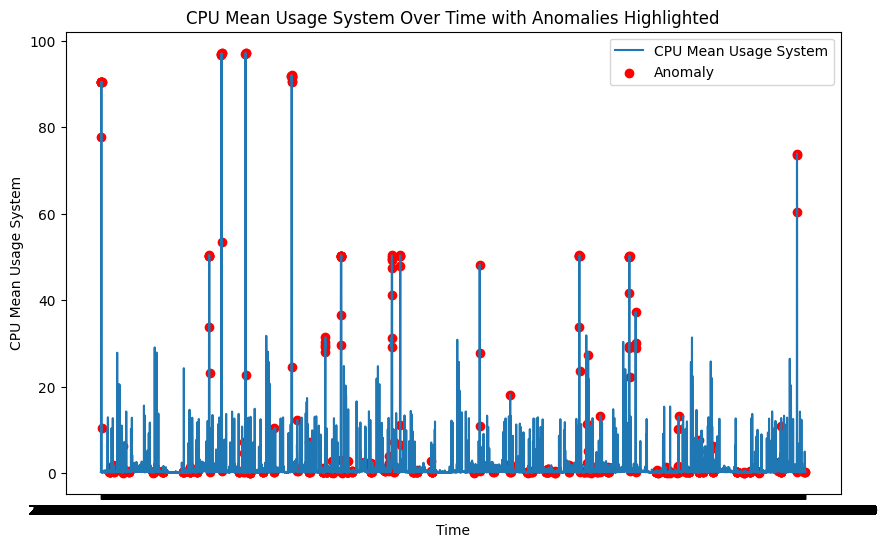

In [20]:
DATASET = "C:\\Users\\maiqu\\Desktop\\Killian\\Research\\Datasets\\MBD\\MBD.csv"
TOPOLOGY = "C:\\Users\\maiqu\\Desktop\\Killian\\Research\\Datasets\\MBD\\MBD_topology.pk"

import pandas as pd
import pickle
import matplotlib.pyplot as plt

data = pd.read_csv(DATASET, header=[0,1])

print(data.columns)

# Extract the TimeStamp column
time = data[('date','Unnamed: 0_level_1')]

# preprocess
metric = data.drop([('date','Unnamed: 0_level_1'), ('label','Unnamed: 131_level_1')], axis = 1)
metric.columns.names = ['pod','metric']
tempm = metric.swaplevel('metric','pod',axis=1).stack()
tempm = (tempm-tempm.mean())/(tempm.std())
metric = tempm.unstack().swaplevel('metric','pod',axis=1).stack().unstack()

with open(TOPOLOGY, 'rb') as f:
    edge_index = pickle.load(f)

# Extract the relevant columns
cpu_usage = data[('R740-3-1', 'cpu.mean_usage_user')]
labels = data[('label','Unnamed: 131_level_1')]

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(time, cpu_usage, label='CPU Mean Usage System')
anomaly_points = cpu_usage[labels == 1]
plt.scatter(time[labels == 1], anomaly_points, color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('CPU Mean Usage System')
plt.title('CPU Mean Usage System Over Time with Anomalies Highlighted')
plt.legend()
plt.show()